<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In this notebook, we will extract English names of birds in Wingspan from pdf table and populate them into a table then translate into Chinese names in a csv file.

In [1]:
# !pip install tabula-py
# !pip install textract
# pip install googletrans
# pip install baidusearch
# pip install baike

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
from tabula import read_pdf

In [3]:
df = read_pdf('Downloads/bird-list-master-a4-20201018.pdf', pages=1)[0].iloc[:,0]
for i in range(2, 16):
    try:
        tmp = read_pdf('Downloads/bird-list-master-a4-20201018.pdf', pages=i)[0].iloc[:,0]
    except:
        print(i)
    df = df.append(tmp)

4


In [4]:
import PyPDF2

In [5]:
pdfFileObj = open('Downloads/bird-list-master-a4-20201018 4.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
extra_birds = [s.split('\n')[0] for s in pageObj.extractText().split('.\n')][0:-1]

In [14]:
df.shape

(384,)

In [15]:
df.dropna().shape

(341,)

In [30]:
df = read_pdf('Downloads/bird-list-core-letter-20200529.pdf', pages="1")[0].iloc[:,0]
for i in range(2, 8):
    try:
        tmp = read_pdf('Downloads/bird-list-core-letter-20200529.pdf', pages=i)[0].iloc[:,0]
    except:
        print(i)
    df = df.append(tmp)

In [31]:
df.dropna().shape

(174,)

In [44]:
import re
pdfFileObj = open('Downloads/bird-list-core-letter-20200529.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(3)
extra_birds = [re.sub(r"(\w)([A-Z])", r"\1 \2", s.split('\n')[0]) for s in pageObj.extractText().split('.\n')][0:-1]

In [46]:
list(df.dropna()) + extra_birds

['Acorn Woodpecker',
 'American Avocet',
 'American Bittern',
 'American Coot',
 'American Crow',
 'American Goldfinch',
 'American Kestrel',
 'American Oystercatcher',
 'American Redstart',
 'American Robin',
 'American White Pelican',
 'American Woodcock',
 'Anhinga',
 'Anna’s Hummingbird',
 'Ash-Throated Flycatcher',
 'Atlantic Puffin',
 'Baird’s Sparrow',
 'Bald Eagle',
 'Baltimore Oriole',
 'Barn Owl',
 'Barn Swallow',
 'Barrow’s Goldeneye',
 'Bell’s Vireo',
 'Belted Kingfisher',
 'Bewick’s Wren',
 'Black Skimmer',
 'Black Tern',
 'Black Vulture',
 'Black-Bellied Whistling Duck',
 'Black-Billed Magpie',
 'Black-Chinned Hummingbird',
 'Black-Crowned Night-Heron',
 'Black-Necked Stilt',
 'Blue Grosbeak',
 'Blue Jay',
 'Blue-Gray Gnatcatcher',
 'Blue-Winged Warbler',
 'Bobolink',
 'Brant',
 'Brewer’s Blackbird',
 'Broad-Winged Hawk',
 'Bronzed Cowbird',
 'Brown Pelican',
 'Brown-Headed Cowbird',
 'Burrowing Owl',
 'Bushtit',
 'California Condor',
 'Canada Goose',
 'Canvasback',
 'Car

In [176]:
from googletrans import Translator

In [182]:
translator = Translator()

In [178]:
print(translator.translate('Acorn Woodpecker', dest='zh-cn').text)

橡子啄木鸟


In [183]:
def google_translate(s):
    return translator.translate(s, dest='zh-cn').text

In [179]:
import pandas as pd
pd_df = pd.DataFrame({"English_Name": list(df.dropna()) + extra_birds}).sort_values('English_Name')

In [181]:
pd_df.head()

,English_Name
0,Acorn Woodpecker
1,American Avocet
2,American Bittern
3,American Coot
4,American Crow


In [184]:
pd_df['Chinese_Name'] = pd_df['English_Name'].apply(lambda r: google_translate(r))

In [198]:
pd_df['Chinese_Bird_Name'] = pd_df['English_Name'].apply(lambda r: google_translate(r.split()[1]) if len(r.split()) > 1 else google_translate(r.split()[0]))

In [199]:
pd_df.head(20)

,English_Name,Chinese_Name,Chinese_Bird_Name
0,Acorn Woodpecker,橡子啄木鸟,啄木鸟
1,American Avocet,美国长嘴鳄,长嘴鳄
2,American Bittern,美国卤汁,卤水
3,American Coot,美国老傻瓜,笨人
4,American Crow,美国乌鸦,乌鸦
5,American Goldfinch,美国金翅雀,金翅雀
6,American Kestrel,美国红est,红est
7,American Oystercatcher,美国蛎cat,牡蛎捕手
8,American Redstart,美国红启动,重新启动
9,American Robin,美国罗宾,罗宾


In [70]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import quote

In [192]:
query = "American Avocet 中文"
url = 'https://www.google.com/search?q=%s' % quote(query)
response = requests.get(url)

In [193]:
soup = BeautifulSoup(response.text)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>American Avocet 中文 - Google Search</title><script nonce="19thd6wQ7TSXS+36YUvelA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.goo
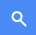
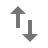
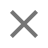

In [194]:
from pprint import pprint
pprint(soup)

<div id="main">
 <div>
  <div class="KP7LCb">
   <div class="bRsWnc">
    <div class="N6RWV">
     <div class="Pg70bf Uv67qb">
      <span class="OXXup">
       All
      </span>
      <a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICCgB">
       Images
      </a>
      <a class="eZt8xd" href="https://maps.google.com/maps?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICSgC">
       Maps
      </a>
      <a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICigD">
       News
      </a>
      <a href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICygE">
       Videos
      </a>
      <a href="/search?q=Amer
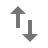
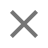

In [195]:
print(soup.find('div', id='main').prettify())

['<div id="main"><div><div class="KP7LCb"> <div class="bRsWnc"> <div class="N6RWV"> <div class="Pg70bf Uv67qb"> <span class="OXXup">All</span><a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICCgB">Images</a><a class="eZt8xd" href="https://maps.google.com/maps?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICSgC">Maps</a><a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICigD">News</a> <a href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICygE">Videos</a> <a href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=shop&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUIDC
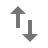
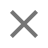

In [196]:
str(soup.find('div', id='main')).split('American avocet')

In [190]:
def baike_crawler(s):
    query = f"{s} 中文"
    url = 'https://www.google.com/search?q=%s' % quote(query)
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    baike_name = None
    try:    
        baike_name = str(soup.find('div', id='main')).split('_百度百科')[0][-20:].split('">')[1]
    except: 
        print(s)
    if baike_name:
        return baike_name
    else:
        return None

In [191]:
pd_df['Chinese_Name_Baidu'] = pd_df['English_Name'].apply(lambda r: baike_crawler(r))

American Avocet
American Crow
American Goldfinch
American Kestrel
Anna’s Hummingbird
Atlantic Puffin
Baird’s Sparrow
Black Tern
Black-Chinned Hummingbird
Blue-Winged Warbler
Bobolink
Brant
Brewer’s Blackbird
Bronzed Cowbird
Bushtit
California Condor
Canada Goose
Canvasback
Cassin’s Sparrow
Cedar Waxwing
Cerulean Warbler
Chestnut-Collared Longspur
Chimney Swift
Clark’s Nutcracker
Common Grackle
Common Loon
Common Nighthawk
Dickcissel
Downy Woodpecker
Fish Crow
Fish Crow
Forster's Tern
Forster’s Tern
Franklin's Gull
Franklin’s Gull
Golden Eagle
Golden Eagle


KeyboardInterrupt: 

In [205]:
pip install translators

     |████████████████████████████████| 57 kB 1.3 MB/s eta 0:00:01
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14588 sha256=b08dfbd6f16d895af2ff6ff78831fed0314c68e8e1ff48219eb9a4e4a3c3a375
  Stored in directory: /Users/hluan/Library/Caches/pip/wheels/9a/ee/03/da5c0b4a8c13362beeb844eb913bbe58a89bde1de2b9157007
Successfully built PyExecJS
Note: you may need to restart the kernel to use updated packages.


In [206]:
import translators as ts

Using United States server backend.


In [219]:
ts.google('bird American Bittern', to_language='zh')

'鸟美国卤汁'